### 제주도 해시태그 워드클라우드 분석

In [1]:
### 데이터 읽어들이기
# - 변수명 : raw_total
# - 데이터셋 파일 : 3_1_crawling_raw.xlsx

import pandas as pd

raw_total = pd.read_excel("./files/3_1_crawling_raw.xlsx")
raw_total.info()
raw_total.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8801 non-null   object
 1   date     8801 non-null   object
 2   like     8801 non-null   object
 3   place    2953 non-null   object
 4   tags     8801 non-null   object
dtypes: object(5)
memory usage: 343.9+ KB


,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."


In [2]:
### 데이터 중에 tags 컬럼의 데이터를 이용해서 워드클라우드 빈도 분석 진행
# 태그(tags) 데이터 확인하기
raw_total["tags"]

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [3]:
### 모든 행의 해시태그 각각의 태그들을 하나의 리스트로 만들기
# - 변수명 : tags_total
# 예시 : ['#제주핫플레이스', '#제주여행', ...... , '#HappyNewYearEveryone']

raw_total["tags"][0][2:-2].split("', '")[0] # split()의 반환값은 리스트

tags_total = [tag for tags in raw_total["tags"] for tag in tags[2:-2].split("', '")]
tags_total

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

### 단어 빈도 분석

In [4]:
### 각 단어의 중복된 갯수(빈도) 확인
# - 변수명 : tag_counts

### 워드카운트(단어 빈도 처리)
from collections import Counter

tag_counts = Counter(tags_total)
print(len(tag_counts))
tag_counts

19413


Counter({'#제주맛집': 3750,
         '#제주도맛집': 3467,
         '#제주여행': 3204,
         '#제주관광': 2898,
         '#제주도': 2096,
         '#제주': 1567,
         '#제주도여행': 1555,
         '#서귀포맛집': 1392,
         '#제주도가볼만한곳': 1047,
         '#서귀포': 872,
         '#제주핫플레이스': 848,
         '#jeju': 776,
         '#제주흑돼지맛집': 730,
         '#제주맛집추천': 728,
         '#일상': 717,
         '#제주도흑돼지': 713,
         '#제주카페': 711,
         '#제주도흑돼지맛집': 709,
         '#제주흑돼지': 693,
         '#협재맛집': 677,
         '#성산일출봉': 674,
         '#제주도민': 637,
         '#제주도그램': 609,
         '#서귀포흑돼지맛집': 605,
         '': 588,
         '#서귀포흑돼지': 582,
         '#제주가볼만한곳': 580,
         '#성산일출봉맛집': 567,
         '#섭지코지': 558,
         '#제주도민맛집': 542,
         '#제주핫플': 530,
         '#선팔': 522,
         '#섭지코지맛집': 519,
         '#제주살이': 516,
         '#여행스타그램': 498,
         '#통갈치구이': 495,
         '#제주통갈치구이': 485,
         '#제주서귀포맛집': 479,
         '#제주반영구': 478,
         '#중문맛집': 472,
         '#제주눈썹문신': 472,
         

### 불용어 처리

In [5]:
STOPWORDS = ["#제주도", "#제주", "#jeju", "#일상", "#jejudo", "#제주육아", "#반영구", "#눈썹문신", "#제주자연눈썹", "#제주속눈썹", "#서귀포남자눈썹문신", "#서귀포자연눈썹",
             "#제주남자눈썹문신", "#서귀포속눈썹", "#서귀포반영구", "#제주메이크업", "#붙임머리", "#제주속눈썹연장", "#제주두피반영구", "#제주문신", "#제주반영구수강", "#서귀포문신",
             "#서귀포눈썹문신", "#제주눈썹문신", "#서귀포속눈썹파마", "#제주속눈썹파마"]

STOPWORDS

['#제주도',
 '#제주',
 '#jeju',
 '#일상',
 '#jejudo',
 '#제주육아',
 '#반영구',
 '#눈썹문신',
 '#제주자연눈썹',
 '#제주속눈썹',
 '#서귀포남자눈썹문신',
 '#서귀포자연눈썹',
 '#제주남자눈썹문신',
 '#서귀포속눈썹',
 '#서귀포반영구',
 '#제주메이크업',
 '#붙임머리',
 '#제주속눈썹연장',
 '#제주두피반영구',
 '#제주문신',
 '#제주반영구수강',
 '#서귀포문신',
 '#서귀포눈썹문신',
 '#제주눈썹문신',
 '#서귀포속눈썹파마',
 '#제주속눈썹파마']

In [6]:
### tags_total 데이터 원본에서 불용어 제거하기
# - 제거 후 변수명 : tag_total_selected
tag_total_selected = [tag for tag in tags_total if tag not in STOPWORDS]
print(len(tag_total_selected))

tag_total_selected

137024


['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#돔나이트',
 '#스트레스',
 '#풀자',
 '#춤추며',
 '#땀날려',
 '#가끔

In [7]:
### 불용어 제거 이후 단어 빈도 확인
tag_total_selected = Counter(tag_total_selected)

print(len(tag_total_selected))
tag_total_selected

19387


Counter({'#제주맛집': 3750,
         '#제주도맛집': 3467,
         '#제주여행': 3204,
         '#제주관광': 2898,
         '#제주도여행': 1555,
         '#서귀포맛집': 1392,
         '#제주도가볼만한곳': 1047,
         '#서귀포': 872,
         '#제주핫플레이스': 848,
         '#제주흑돼지맛집': 730,
         '#제주맛집추천': 728,
         '#제주도흑돼지': 713,
         '#제주카페': 711,
         '#제주도흑돼지맛집': 709,
         '#제주흑돼지': 693,
         '#협재맛집': 677,
         '#성산일출봉': 674,
         '#제주도민': 637,
         '#제주도그램': 609,
         '#서귀포흑돼지맛집': 605,
         '': 588,
         '#서귀포흑돼지': 582,
         '#제주가볼만한곳': 580,
         '#성산일출봉맛집': 567,
         '#섭지코지': 558,
         '#제주도민맛집': 542,
         '#제주핫플': 530,
         '#선팔': 522,
         '#섭지코지맛집': 519,
         '#제주살이': 516,
         '#여행스타그램': 498,
         '#통갈치구이': 495,
         '#제주통갈치구이': 485,
         '#제주서귀포맛집': 479,
         '#제주반영구': 478,
         '#중문맛집': 472,
         '#제주도관광': 471,
         '#여행': 455,
         '#먹스타그램': 453,
         '#제주시': 451,
         '#제주스타그램': 432,
       

In [8]:
### Counter 클래스 내에 단어 빈도 상위 값 추출하는 함수
# - most_common(n) : 단어 빈도 상위 n개 추출 (튜플 타입으로 단어와 빈도가 구분되어 출력됨)
tag_total_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#소통', 396),
 ('#맞팔', 395),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#daily', 362),
 ('#제주도여행코스', 361)]

### 단어 빈도 상위 30개에 대한 막대그래프(빈도 그래프) 시각화

In [9]:
### 단어 빈도 상위 30개에 대한 막대그래프 그리기

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")

### 단어 빈도 상위 30개에 대한 데이터프레임으로 생성하여 처리
tag_counts_df = pd.DataFrame(tag_total_selected.most_common(30))
tag_counts_df.head(1)

### 컬럼명 재정의
tag_counts_df.columns = ["tags", "counts"]
tag_counts_df.head(1)

,tags,counts
0,#제주맛집,3750


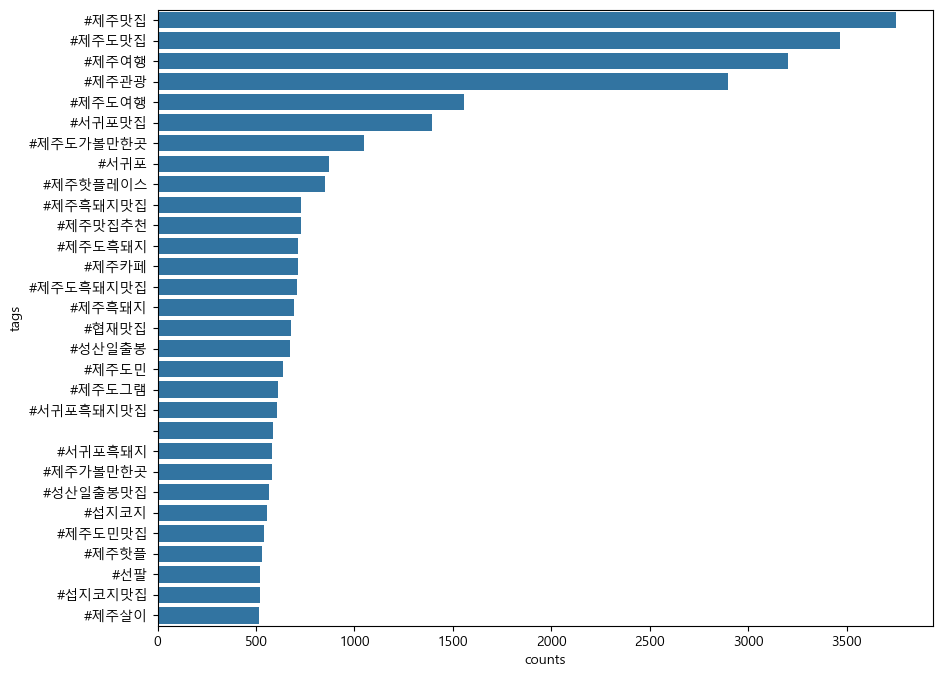

In [10]:
### 막대그래프 그리기
plt.figure(figsize=(10, 8))
sns.barplot(x="counts", y="tags", data=tag_counts_df)
plt.show()

### 워드클라우드 시각화

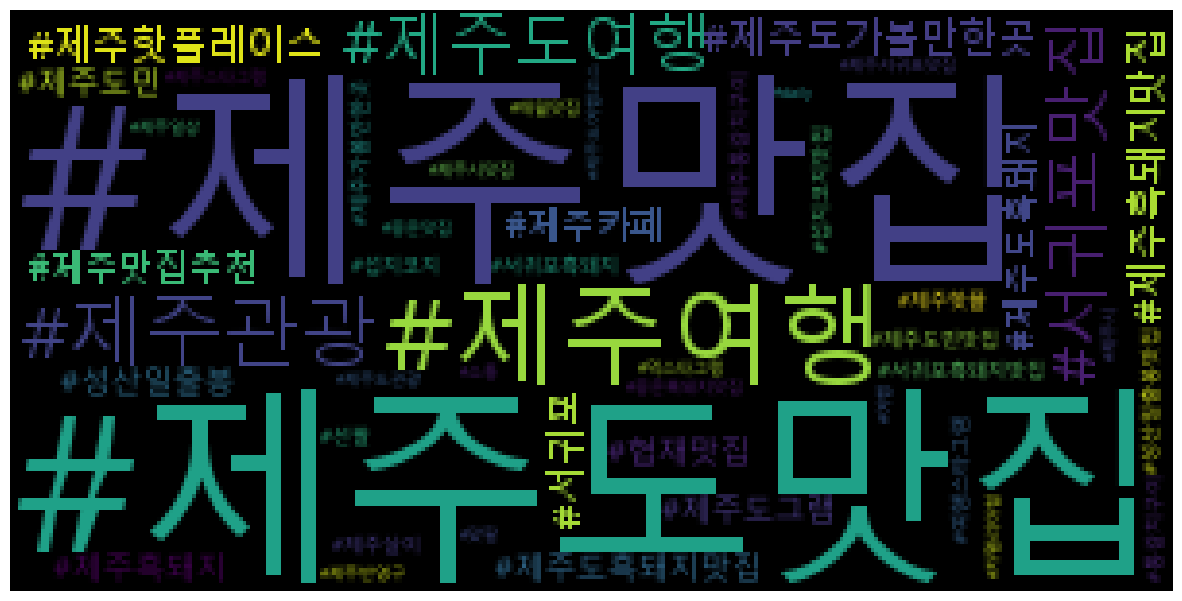

In [11]:
### 단어빈도 상위 50개에 대한 워드클라우드 시각화하기
# - 워드클라우드 시각화 이미지 파일로 저장
# - 저장 파일명 : ./imges/jeju_tag_wordcloud.png

### 워드클라우드 시각화
from wordcloud import WordCloud

### 한글처리 폰트 설정
plt.rc("font", family="Malgun Gothic")

### 한글 폰트 위치 설정
# - 윈도우
font_path = "c:/Windows/Fonts/malgun.ttf"

### 워드클라우드 클래스 생성 및 설정
wordcloud = WordCloud(
    # 폰트 설정 
    font_path=font_path,
    # 배경색 지정
    # background_color="white",
    background_color="black",
    # 표시할 단어의 갯수 지정(단어빈도가 높은 상위부터 50개만 추출하여 시각화 처리)
    max_words=50,
    # 폰트 스케일 지정 : 0~1사이의 값으로 지정(값이 클수록 폰트가 전반적으로 커짐)
    relative_scaling=0.1,
    # 그래프 너비 지정
    width=300,
    # 그래프 높이 지정
    height=150
).generate_from_frequencies(tag_total_selected)

### 시각화 틀정의
plt.figure(figsize=(15, 10))

### 워드클라우드는 이미지로 생성됩니다. 이미지로 시각화하는 함수 사용
plt.imshow(wordcloud)

### x, y축 좌표 제거하기
plt.axis("off")

### 이미지 저장하기
plt.savefig("./images/jeju_tag_wordcloud.png")

### 이미지 보이기(이미지 처리 종료)
plt.show()

### 워드클라우드의 이미지 모양은 기본적으로 "사각형"을 사용함
# - 다양한 모양을 사용하고자 할 경우 : 인터넷에 매우 많은 이미지를 이용한 모양들이 있음(참고)